# Задание по программированию: Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции


## Задача 1. Минимизация гладкой функции

min2       fun: 1.745268290344928
 hess_inv: array([[5.98750711]])
      jac: array([-2.05636024e-06])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627619])
min30       fun: -11.898894665981322
 hess_inv: array([[1.67940841]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.880193])


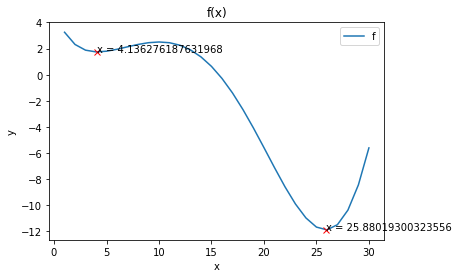

In [1]:
import math
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)
def f(x):
    return math.sin(x / 5.0) * math.exp(x / 10.0) + 5 * math.exp(-x / 2.0)

# print(minimize(f, [1]))
# print()
# for i in range(1, 30):
#     min = minimize(f, [i]).x
#     print("x0 = " + str(i) + ", f(" + str(min) + ") = " + str(f(min)))

min_2 = minimize(f, [2], method = 'BFGS')
min_30 = minimize(f, [30], method = 'BFGS')
print('min2', min_2)
print('min30', min_30)
with open("result_1.txt", 'w') as file1:
    file1.write(str(round(min_2.fun, 2)) + " " + str(round(min_30.fun, 2)))

mins = [min_2.x[0], min_30.x[0]]
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.set_title("f(x)")  # Add a title to the axes.
ax.plot([x for x in range(1,31)], [f(x) for x in range(1,31)], label = 'f')
ax.plot(mins, [f(x) for x in mins], 'rx')
[ax.annotate('x = ' + str(x), (x, f(x))) for x in mins]
ax.set_xlabel('x')  # Add an x-label to the axes.
ax.set_ylabel('y')  # Add a y-label to the axes.
ax.legend()  # Add a legend.


## Задача 2. Глобальная оптимизация

In [2]:
from scipy.optimize import differential_evolution as de

# f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)
def f(x):
    return math.sin(x / 5.0) * math.exp(x / 10.0) + 5 * math.exp(-x / 2.0)

glob_min_de = de(f,[(1, 30)])
print(glob_min_de)
with open('result_2.txt', 'w') as file2:
    file2.write(str(round(glob_min_de.fun, 2)))

     fun: -11.898894665981237
     jac: array([5.32907008e-07])
 message: 'Optimization terminated successfully.'
    nfev: 98
     nit: 5
 success: True
       x: array([25.88019357])


## Задача 3. Минимизация негладкой функции

BFGS [5]
      fun: 1
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([5.])
BFGS [25]
      fun: -11
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([25.])
BFGS [30]
      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])
de
     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 107
     nit: 6
 success: True
       x: array([26.38277866])


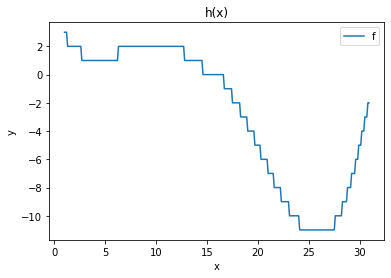

In [10]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize, differential_evolution as de
import numpy as np


# f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)
def f(x):
    return math.sin(x / 5.0) * math.exp(x / 10.0) + 5 * math.exp(-x / 2.0)

# h(x) = int(f(x))
def h(x):
    return int(f(x))

fig, ax = plt.subplots()
ax.set_title("h(x)")  # Add a title to the axes.
ax.plot([x for x in np.arange(1,31, 0.1)], [h(x) for x in np.arange(1,31, 0.1)], label = 'f')
# ax.plot(mins, [f(x) for x in mins], 'rx')
# [ax.annotate('x = ' + str(x), (x, f(x))) for x in mins]
ax.set_xlabel('x')  # Add an x-label to the axes.
ax.set_ylabel('y')  # Add a y-label to the axes.
ax.legend()  # Add a legend.


min_bfgs_5 = minimize(h, [5], method = 'BFGS')
print('BFGS [5]')
print(min_bfgs_5)
min_bfgs_25 = minimize(h, [25], method = 'BFGS')
print('BFGS [25]')
print(min_bfgs_25)

min_bfgs_30 = minimize(h, [30], method = 'BFGS')
print('BFGS [30]')
print(min_bfgs_30)
min_de = de(h, [(1, 30)])
print('de')
print(min_de)

with open('result_3.txt', 'w') as file3:
    file3.write(str(round(min_bfgs_30.fun, 2)) + ' ' + str(round(min_de.fun, 2)))